<a href="https://colab.research.google.com/github/theAkhileshRai/DeepLearning/blob/master/Anamoly_detection2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install pycaret

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
%matplotlib inline

In [0]:
cross_bar_df1 = pd.read_csv('/content/Normalised_CroosBar_01.csv',index_col=False)
cross_bar_df1 = cross_bar_df1[cross_bar_df1.columns[1:13]]

cross_bar_df2 = pd.read_csv('/content/Normalised_CroosBar_04.csv',index_col=False)
cross_bar_df2 = cross_bar_df2[cross_bar_df2.columns[1:13]]

cross_bar_df3 = pd.read_csv('/content/Normalised_CroosBar_05.csv',index_col=False)
cross_bar_df3 = cross_bar_df3[cross_bar_df3.columns[1:13]]


In [4]:
cross_bar_df1.head()

,time,cyl,s_temp_crank,d_temp_crank,s_pressure_crank,d_pressure_crank,rpm_crank,s_temp_mean,d_temp_mean,s_pressure_mean,d_pressure_mean,rpm_mean
0,2019-04-05 02:30:00,1.0,0.666534,2.080444,3.220836,10.105964,10.063987,0.666534,2.053527,3.307406,10.142075,10.063987
1,2019-04-05 03:30:00,1.0,0.716066,2.153494,3.135203,9.998847,10.075669,0.716066,2.120434,3.243347,10.053597,10.075669
2,2019-04-05 04:30:00,1.0,0.687551,2.142630,3.066270,9.954641,10.081478,0.687551,2.105328,3.181119,10.001306,10.081478
3,2019-04-05 05:30:00,1.0,0.686916,2.140013,3.071850,9.956670,10.054274,0.686916,2.101800,3.191233,10.008420,10.054274
4,2019-04-05 06:30:00,1.0,0.698125,2.156244,3.063865,9.961413,10.091478,0.698125,2.117328,3.183534,10.009700,10.091478


In [5]:
print(cross_bar_df1.shape,cross_bar_df2.shape,cross_bar_df3.shape,)

(13179, 12) (363, 12) (6199, 12)


In [6]:
cross_bar_df2.head()

,time,cyl,s_temp_crank,d_temp_crank,s_pressure_crank,d_pressure_crank,rpm_crank,s_temp_mean,d_temp_mean,s_pressure_mean,d_pressure_mean,rpm_mean
0,2019-09-18 12:30:00,2.0,0.209361,3.669231,2.841608,16.996985,11.766685,0.209361,3.693108,2.842620,17.174490,35.709109
1,2019-09-18 13:30:00,2.0,0.242446,3.693560,2.867769,17.005224,14.486232,0.242446,3.722898,2.861971,17.194612,32.329571
2,2019-09-19 21:30:00,2.0,0.528813,3.330968,2.005675,12.924733,14.523496,0.528813,3.353176,2.035285,13.094825,35.842758
3,2019-09-19 22:30:00,2.0,0.622172,4.082144,2.785608,16.368342,14.479579,0.622172,4.102823,2.786716,16.516277,35.777038
4,2019-09-19 23:30:00,2.0,0.518412,3.959500,2.843085,16.561951,58.299788,0.518412,3.981560,2.839965,16.704652,53.010183


In [7]:
cross_bar_df3.head()

,time,cyl,s_temp_crank,d_temp_crank,s_pressure_crank,d_pressure_crank,rpm_crank,s_temp_mean,d_temp_mean,s_pressure_mean,d_pressure_mean,rpm_mean
0,2019-02-20 20:30:00,2.0,0.376892,0.380291,7.566670,8.072568,984.697912,0.376892,1.174602,3.931527,5.228811,984.697912
1,2019-02-22 06:30:00,2.0,0.129573,1.736679,2.513616,9.921748,12.605002,0.129573,0.932906,1.299533,5.003472,12.603383
2,2019-02-22 07:30:00,2.0,0.145445,1.735308,2.500727,9.733318,12.430530,0.145445,0.942484,1.196900,4.814091,12.520356
3,2019-02-22 08:30:00,2.0,0.166928,1.757804,2.516358,9.769955,11.265634,0.166928,0.959568,1.191835,4.817510,11.936289
4,2019-02-22 09:30:00,2.0,0.189870,1.797234,2.506760,9.836409,11.244870,0.189870,0.998961,1.119531,4.785946,11.926555


In [0]:
merge_df = pd.concat([cross_bar_df1, cross_bar_df2, cross_bar_df3],join = 'inner' )

In [0]:
merge_df = merge_df.reset_index(drop=True)

In [16]:
merge_df

,time,cyl,s_temp_crank,d_temp_crank,s_pressure_crank,d_pressure_crank,rpm_crank,s_temp_mean,d_temp_mean,s_pressure_mean,d_pressure_mean,rpm_mean
0,2019-04-05 02:30:00,1.0,0.666534,2.080444,3.220836,10.105964,10.063987,0.666534,2.053527,3.307406,10.142075,10.063987
1,2019-04-05 03:30:00,1.0,0.716066,2.153494,3.135203,9.998847,10.075669,0.716066,2.120434,3.243347,10.053597,10.075669
2,2019-04-05 04:30:00,1.0,0.687551,2.142630,3.066270,9.954641,10.081478,0.687551,2.105328,3.181119,10.001306,10.081478
3,2019-04-05 05:30:00,1.0,0.686916,2.140013,3.071850,9.956670,10.054274,0.686916,2.101800,3.191233,10.008420,10.054274
4,2019-04-05 06:30:00,1.0,0.698125,2.156244,3.063865,9.961413,10.091478,0.698125,2.117328,3.183534,10.009700,10.091478
...,...,...,...,...,...,...,...,...,...,...,...,...
6194,2019-10-08 14:30:00,4.0,0.367023,2.290135,0.203793,2.771141,12.087111,0.367023,2.348889,0.177171,2.796853,12.087111
6195,2019-10-08 15:30:00,4.0,0.438879,2.380740,0.202395,2.783980,12.266956,0.438879,2.432139,0.178642,2.804289,12.266956
6196,2019-10-08 16:30:00,4.0,0.480072,2.424573,0.195123,2.746196,12.353345,0.480072,2.481738,0.174627,2.793009,12.353345
6197,2019-10-08 17:30:00,4.0,0.507349,2.488776,0.177829,2.750903,12.217548,0.507349,2.522124,0.168590,2.789289,12.217548


In [0]:
merge_df.to_csv("/content/Normalised_Merge_df.csv")

In [24]:
merge_df.columns 

Index(['time', 'cyl', 's_temp_crank', 'd_temp_crank', 's_pressure_crank',
       'd_pressure_crank', 'rpm_crank', 's_temp_mean', 'd_temp_mean',
       's_pressure_mean', 'd_pressure_mean', 'rpm_mean'],
      dtype='object')

In [0]:
merge_df2 = merge_df.drop(labels = ['time','cyl'],axis=1)

In [26]:
merge_df2.head()

,s_temp_crank,d_temp_crank,s_pressure_crank,d_pressure_crank,rpm_crank,s_temp_mean,d_temp_mean,s_pressure_mean,d_pressure_mean,rpm_mean
0,0.666534,2.080444,3.220836,10.105964,10.063987,0.666534,2.053527,3.307406,10.142075,10.063987
1,0.716066,2.153494,3.135203,9.998847,10.075669,0.716066,2.120434,3.243347,10.053597,10.075669
2,0.687551,2.142630,3.066270,9.954641,10.081478,0.687551,2.105328,3.181119,10.001306,10.081478
3,0.686916,2.140013,3.071850,9.956670,10.054274,0.686916,2.101800,3.191233,10.008420,10.054274
4,0.698125,2.156244,3.063865,9.961413,10.091478,0.698125,2.117328,3.183534,10.009700,10.091478


# Anamoly Detection

In [27]:
from pycaret.anomaly import *
expo_anamoly = setup(merge_df2)


Setup Succesfully Completed!


,Description,Value
0,session_id,2831
1,Original Data,"(19741, 10)"
2,Missing Values,False
3,Numeric Features,10
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(19741, 10)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


# One Class SVM

In [0]:
one_class_svm = create_model('svm')

In [0]:
one_class_svm_pred = predict_model(one_class_svm, data = merge_df2)

In [30]:
one_class_svm_pred

,s_temp_crank,d_temp_crank,s_pressure_crank,d_pressure_crank,rpm_crank,s_temp_mean,d_temp_mean,s_pressure_mean,d_pressure_mean,rpm_mean,Label,Score
0,0.666534,2.080444,3.220836,10.105964,10.063987,0.666534,2.053527,3.307406,10.142075,10.063987,0,29.599181
1,0.716066,2.153494,3.135203,9.998847,10.075669,0.716066,2.120434,3.243347,10.053597,10.075669,0,-0.228785
2,0.687551,2.142630,3.066270,9.954641,10.081478,0.687551,2.105328,3.181119,10.001306,10.081478,0,-22.954512
3,0.686916,2.140013,3.071850,9.956670,10.054274,0.686916,2.101800,3.191233,10.008420,10.054274,0,-9.307971
4,0.698125,2.156244,3.063865,9.961413,10.091478,0.698125,2.117328,3.183534,10.009700,10.091478,0,-24.961897
...,...,...,...,...,...,...,...,...,...,...,...,...
19736,0.367023,2.290135,0.203793,2.771141,12.087111,0.367023,2.348889,0.177171,2.796853,12.087111,0,-151.474938
19737,0.438879,2.380740,0.202395,2.783980,12.266956,0.438879,2.432139,0.178642,2.804289,12.266956,0,-84.013844
19738,0.480072,2.424573,0.195123,2.746196,12.353345,0.480072,2.481738,0.174627,2.793009,12.353345,0,-48.440336
19739,0.507349,2.488776,0.177829,2.750903,12.217548,0.507349,2.522124,0.168590,2.789289,12.217548,0,-114.905716


In [0]:
one_class_svm_pred.to_csv("/content/OneClassSVM_Pred_df.csv")

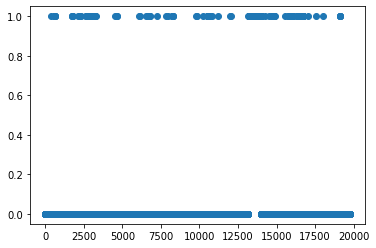

In [31]:
import matplotlib.pyplot as plt
x = [i for i in range(len(one_class_svm_pred["Label"]))]
plt.scatter(x,one_class_svm_pred["Label"])
plt.show()

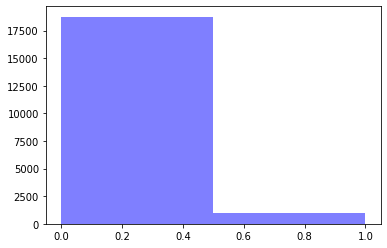

In [32]:
num_bins = 2
n, bins, patches = plt.hist(one_class_svm_pred["Label"], num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [33]:
collections.Counter(one_class_svm_pred["Label"])

Counter({0: 18754, 1: 987})

In [34]:
987/(18754+987)

0.04999746720024315

# iforest

In [0]:
 iforest = create_model('iforest')

In [0]:
iforest_pred = predict_model(iforest, data = merge_df2)

In [39]:
iforest_pred

,s_temp_crank,d_temp_crank,s_pressure_crank,d_pressure_crank,rpm_crank,s_temp_mean,d_temp_mean,s_pressure_mean,d_pressure_mean,rpm_mean,Label,Score
0,0.666534,2.080444,3.220836,10.105964,10.063987,0.666534,2.053527,3.307406,10.142075,10.063987,0,-0.109432
1,0.716066,2.153494,3.135203,9.998847,10.075669,0.716066,2.120434,3.243347,10.053597,10.075669,0,-0.104707
2,0.687551,2.142630,3.066270,9.954641,10.081478,0.687551,2.105328,3.181119,10.001306,10.081478,0,-0.127592
3,0.686916,2.140013,3.071850,9.956670,10.054274,0.686916,2.101800,3.191233,10.008420,10.054274,0,-0.126017
4,0.698125,2.156244,3.063865,9.961413,10.091478,0.698125,2.117328,3.183534,10.009700,10.091478,0,-0.122679
...,...,...,...,...,...,...,...,...,...,...,...,...
19736,0.367023,2.290135,0.203793,2.771141,12.087111,0.367023,2.348889,0.177171,2.796853,12.087111,0,-0.099290
19737,0.438879,2.380740,0.202395,2.783980,12.266956,0.438879,2.432139,0.178642,2.804289,12.266956,0,-0.116588
19738,0.480072,2.424573,0.195123,2.746196,12.353345,0.480072,2.481738,0.174627,2.793009,12.353345,0,-0.121868
19739,0.507349,2.488776,0.177829,2.750903,12.217548,0.507349,2.522124,0.168590,2.789289,12.217548,0,-0.121928


In [0]:
iforest_pred.to_csv("/content/iforest_df.csv")

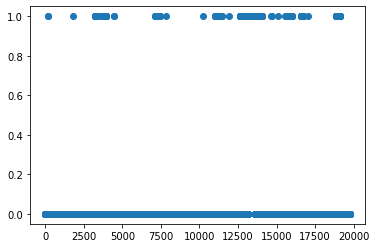

In [41]:
import matplotlib.pyplot as plt
x = [i for i in range(len(iforest_pred["Label"]))]
plt.scatter(x,iforest_pred["Label"])
plt.show()

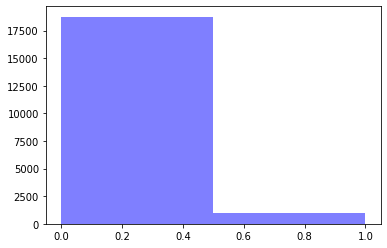

In [42]:
num_bins = 2
n, bins, patches = plt.hist(iforest_pred["Label"], num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [43]:
collections.Counter(iforest_pred["Label"])

Counter({0: 18754, 1: 987})

In [44]:
987/(18754+987)

0.04999746720024315

# Angle-base Outlier Detection

In [0]:
abod = create_model('abod')

In [0]:
abod_pred = predict_model(abod, data = merge_df2)

In [50]:
abod_pred

,s_temp_crank,d_temp_crank,s_pressure_crank,d_pressure_crank,rpm_crank,s_temp_mean,d_temp_mean,s_pressure_mean,d_pressure_mean,rpm_mean,Label,Score
0,0.666534,2.080444,3.220836,10.105964,10.063987,0.666534,2.053527,3.307406,10.142075,10.063987,0,-2603.248592
1,0.716066,2.153494,3.135203,9.998847,10.075669,0.716066,2.120434,3.243347,10.053597,10.075669,0,-614.507996
2,0.687551,2.142630,3.066270,9.954641,10.081478,0.687551,2.105328,3.181119,10.001306,10.081478,0,-34626.695133
3,0.686916,2.140013,3.071850,9.956670,10.054274,0.686916,2.101800,3.191233,10.008420,10.054274,0,-8128.370255
4,0.698125,2.156244,3.063865,9.961413,10.091478,0.698125,2.117328,3.183534,10.009700,10.091478,0,-19414.185730
...,...,...,...,...,...,...,...,...,...,...,...,...
19736,0.367023,2.290135,0.203793,2.771141,12.087111,0.367023,2.348889,0.177171,2.796853,12.087111,1,-311.681094
19737,0.438879,2.380740,0.202395,2.783980,12.266956,0.438879,2.432139,0.178642,2.804289,12.266956,1,-23.792976
19738,0.480072,2.424573,0.195123,2.746196,12.353345,0.480072,2.481738,0.174627,2.793009,12.353345,0,-798.582223
19739,0.507349,2.488776,0.177829,2.750903,12.217548,0.507349,2.522124,0.168590,2.789289,12.217548,0,-2611.331521


In [0]:
abod_pred.to_csv("/content/abod_pred_df.csv")

# Clustering-Based Local Outlier	

In [0]:
cluster = create_model('cluster')

In [0]:
cluster_pred = predict_model(cluster, data = merge_df2)

In [54]:
cluster_pred

,s_temp_crank,d_temp_crank,s_pressure_crank,d_pressure_crank,rpm_crank,s_temp_mean,d_temp_mean,s_pressure_mean,d_pressure_mean,rpm_mean,Label,Score
0,0.666534,2.080444,3.220836,10.105964,10.063987,0.666534,2.053527,3.307406,10.142075,10.063987,0,8.130700
1,0.716066,2.153494,3.135203,9.998847,10.075669,0.716066,2.120434,3.243347,10.053597,10.075669,0,7.961673
2,0.687551,2.142630,3.066270,9.954641,10.081478,0.687551,2.105328,3.181119,10.001306,10.081478,0,7.862128
3,0.686916,2.140013,3.071850,9.956670,10.054274,0.686916,2.101800,3.191233,10.008420,10.054274,0,7.877663
4,0.698125,2.156244,3.063865,9.961413,10.091478,0.698125,2.117328,3.183534,10.009700,10.091478,0,7.870229
...,...,...,...,...,...,...,...,...,...,...,...,...
19736,0.367023,2.290135,0.203793,2.771141,12.087111,0.367023,2.348889,0.177171,2.796853,12.087111,0,3.669514
19737,0.438879,2.380740,0.202395,2.783980,12.266956,0.438879,2.432139,0.178642,2.804289,12.266956,0,3.788660
19738,0.480072,2.424573,0.195123,2.746196,12.353345,0.480072,2.481738,0.174627,2.793009,12.353345,0,3.888200
19739,0.507349,2.488776,0.177829,2.750903,12.217548,0.507349,2.522124,0.168590,2.789289,12.217548,0,3.796066


In [0]:
cluster_pred.to_csv("/content/cluster_pred_df.csv")